<a href="https://colab.research.google.com/github/mateuszrajca69/r/blob/main/G%C5%81%C3%93WNYprojekt69.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
### Mateusz Rajca
###Zainstaluj pakiet ortools (patrz zad. 1) i puść program rozwiązujący problem kontenerowy (Bin packing, https://developers.google.com/optimization/bin/bin_packing) dla różnych danych wejściowych.


In [ ]:
!pip install ortools

     |████████████████████████████████| 14.0MB 309kB/s 
     |████████████████████████████████| 1.0MB 42.0MB/s 
     |████████████████████████████████| 133kB 41.4MB/s 
ERROR: tensorflow-metadata 0.26.0 has requirement absl-py<0.11,>=0.9, but you'll have absl-py 0.11.0 which is incompatible.
  Found existing installation: protobuf 3.12.4
    Uninstalling protobuf-3.12.4:
      Successfully uninstalled protobuf-3.12.4
  Found existing installation: absl-py 0.10.0
    Uninstalling absl-py-0.10.0:
      Successfully uninstalled absl-py-0.10.0


In [ ]:
pip install --user ortools

In [ ]:
#Poniższy kod importuje wymagane biblioteki.
from ortools.linear_solver import pywraplp

In [ ]:
def create_data_model():
    """tworzymy dane dla przykładu"""
    data = {}
    weights = [48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30]    #wagi: wektor zawierający wagi elementów. 11(elementów)
    data['weights'] = weights
    data['items'] = list(range(len(weights)))
    data['bins'] = data['items']                              
    data['bin_capacity'] = 100                                #bin_capacity: pojedyncza liczba określająca pojemność pojemników.
    return data


    #maksymalna liczba pojemników, których można potrzebować, to liczba przedmiotów, ponieważ zawsze można umieścić każdy przedmiot w oddzielnym koszu.



    
def main():
    data = create_data_model()


# zastosowujemy solver do programowania mieszanych liczb całkowitych. Poniższy kod deklaruje solver.
    solver = pywraplp.Solver.CreateSolver('SCIP')


   
# x [i, j] = 1, jeśli element i jest zapakowany do pojemnika j.
    x = {}
    for i in data['items']:
        for j in data['bins']:
            x[(i, j)] = solver.IntVar(0, 1, 'x_%i_%i' % (i, j))

   
# y [j] = 1, jeśli używany jest bin j.
    y = {}
    for j in data['bins']:
        y[j] = solver.IntVar(0, 1, 'y[%i]' % j)

#Podobnie jak  z wieloma plecakami, definiuje tablicę zmiennych x [(i, j)] których wartość wynosi 1, jeśli element i zostanie umieszczony w bin j, a 0 w przeciwnym razie.
#W przypadku pakowania w kontener definiuje się również tablicę zmiennych y [j] której wartość wynosi 1, jeśli używany jest kontener(przedział) j - to znaczy 
#jeśli są w niej spakowane jakiekolwiek elementy - i 0 w przeciwnym razie. Suma y [j] będzie liczbą użytych przedziałów (konetnerów).

 
  # definiujemy ograniczenia problemu:
    for i in data['items']:
        solver.Add(sum(x[i, j] for j in data['bins']) == 1)

# Ilość umieszczona w każdym pojemniku nie może przekraczać jego pojemności.
    
    
    for j in data['bins']:
        solver.Add(
            sum(x[(i, j)] * data['weights'][i] for i in data['items']) <= y[j] *
            data['bin_capacity'])
#Każdy przedmiot należy umieścić w dokładnie jednym pojemniku. To ograniczenie jest ustalane przez wymaganie, aby suma x [i] [j] na wszystkich pojemnikach j była równa 1. 

   
# Cel: zminimalizować liczbę używanych pojemników.
    solver.Minimize(solver.Sum([y[j] for j in data['bins']]))



#Poniższy kod wywołuje solver i wyświetla rozwiązanie.
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        num_bins = 0.
        for j in data['bins']:
            if y[j].solution_value() == 1:
                bin_items = []
                bin_weight = 0
                for i in data['items']:
                    if x[i, j].solution_value() > 0:
                        bin_items.append(i)
                        bin_weight += data['weights'][i]
                if bin_weight > 0:
                    num_bins += 1
                    print('numer pojemnika/kontenera :', j)
                    print('  spakowane przedmioty:', bin_items)
                    print('  ostateczna waga przedmiotów:', bin_weight)
                    print()
        print()
        print('Ilość użytych pojemników:', num_bins)
        print('Time = ', solver.WallTime(), ' milliseconds')
    else:
        print('Problem nie ma optymalnego rozwiązania.')


if __name__ == '__main__':
    main()

numer pojemnika/kontenera : 0
  spakowane przedmioty: [0, 1, 2]
  ostateczna waga przedmiotów: 97

numer pojemnika/kontenera : 1
  spakowane przedmioty: [3, 4, 5]
  ostateczna waga przedmiotów: 99

numer pojemnika/kontenera : 2
  spakowane przedmioty: [6, 7]
  ostateczna waga przedmiotów: 84

numer pojemnika/kontenera : 3
  spakowane przedmioty: [8, 9, 10]
  ostateczna waga przedmiotów: 90


Ilość użytych pojemników: 4.0
Time =  15  milliseconds


In [ ]:
#Rozwiązanie pokazuje minimalną liczbę pojemników potrzebną do zapakowania wszystkich artykułów. 
#Dla każdego używanego pojemnika rozwiązanie pokazuje zapakowane w nim elementy i całkowitą wagę pojemnika.

In [ ]:
#1 mili sekunda to 1/1000 sekundy
#15ms = 0,02s dla 18 tez 

In [ ]:
# program do obliczania ms : https://www.convertworld.com/pl/czas/milisekundy.html

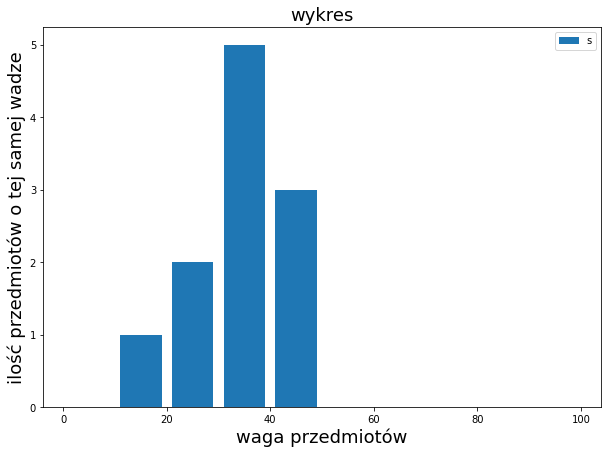

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

populacja= [48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30]
bins=[0,10,20,30,40,50,60,70,80,90,100]

plt.hist(populacja,bins,histtype='bar', rwidth=0.8)


plt.xlabel('waga przedmiotów',fontsize='18')
plt.ylabel('ilość przedmiotów o tej samej wadze',fontsize='18')
plt.title('wykres',fontsize='18')
plt.legend('s')
plt.show()


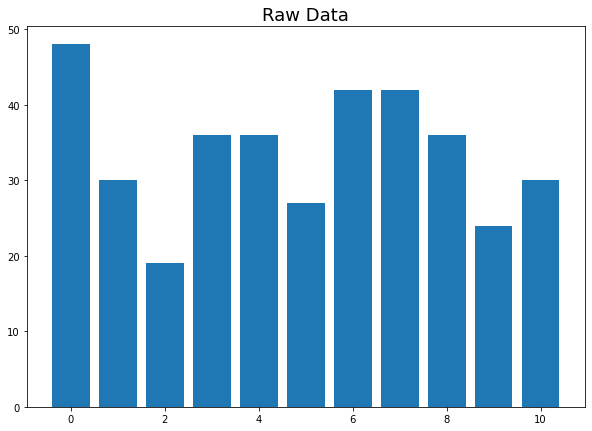

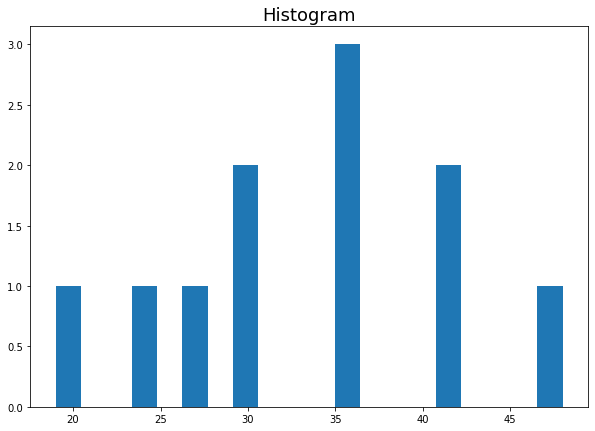

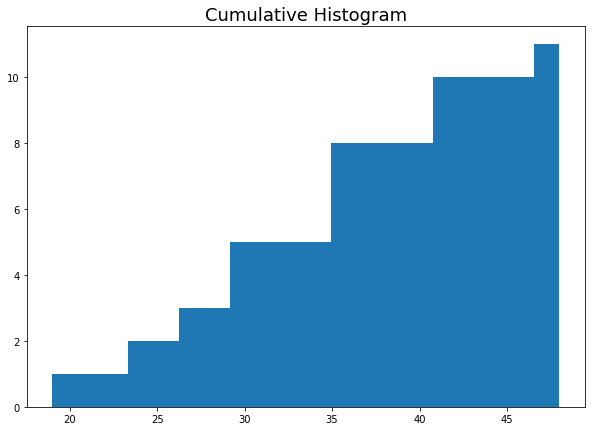

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))


n = [48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30]

m = [m for m in range(len(n))]
plt.bar(m, n)
plt.title("Raw Data",fontsize='18')
plt.show()

plt.figure(figsize=(10,7))
plt.hist(n, bins=20)
plt.title("Histogram",fontsize='18')
plt.show()

plt.figure(figsize=(10,7))
plt.hist(n, cumulative=True, bins=20)
plt.title("Cumulative Histogram",fontsize='18')
plt.show()

In [ ]:
def create_data_model():
    """Create the data for the example."""
    data = {}
    weights = [48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30,48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30,48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30,2,3,3,3,1,55,99,89,12,6,10,11,23,33,56,78,90,10,8,7,7,7,6,6,13,17,22,32,24,25,5,7,8,9,1,10,48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30,48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30,48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30,2,3,3,3,1,55,99,89,12,6,10,11,23,33,56,78,90,10,8,7,7,7,6,6,13,17,22,32,24,25,5,7,8,9,1,10]    #wagi: wektor zawierający wagi elementów.
    #dla 138 przedmiotów 
    data['weights'] = weights
    data['items'] = list(range(len(weights)))
    data['bins'] = data['items']                              
    data['bin_capacity'] = 100                                #bin_capacity: pojedyncza liczba określająca pojemność pojemników.
    return data


    #maksymalna liczba pojemników, których można potrzebować, to liczba przedmiotów, ponieważ zawsze można umieścić każdy przedmiot w oddzielnym koszu.



    
def main():
    data = create_data_model()


# zastosowano solver do programowania mieszanych liczb całkowitych. Poniższy kod deklaruje solver.
    solver = pywraplp.Solver.CreateSolver('SCIP')


   
# x [i, j] = 1, jeśli element i jest zapakowany do pojemnika j.
    x = {}
    for i in data['items']:
        for j in data['bins']:
            x[(i, j)] = solver.IntVar(0, 1, 'x_%i_%i' % (i, j))

   
# y [j] = 1, jeśli używany jest bin j.
    y = {}
    for j in data['bins']:
        y[j] = solver.IntVar(0, 1, 'y[%i]' % j)

#Podobnie jak  z wieloma plecakami, definiuje tablicę zmiennych x [(i, j)], których wartość wynosi 1, jeśli element i zostanie umieszczony w bin j, a 0 w przeciwnym razie.
#W przypadku pakowania w przedział definiuje się również tablicę zmiennych y [j], której wartość wynosi 1, jeśli używany jest przedział j - to znaczy, 
#jeśli są w niej spakowane jakiekolwiek elementy - i 0 w przeciwnym razie. Suma y [j] będzie liczbą użytych przedziałów.

 
  #Poniższy kod definiuje ograniczenia problemu:
    for i in data['items']:
        solver.Add(sum(x[i, j] for j in data['bins']) == 1)

    
# Ilość umieszczona w każdym pojemniku nie może przekraczać jego pojemności.
    for j in data['bins']:
        solver.Add(
            sum(x[(i, j)] * data['weights'][i] for i in data['items']) <= y[j] *
            data['bin_capacity'])
#Każdy przedmiot należy umieścić w dokładnie jednym pojemniku. To ograniczenie jest ustalane przez wymaganie, aby suma x [i] [j] na wszystkich pojemnikach j była równa 1. 

   
# Cel: zminimalizować liczbę używanych pojemników.
    solver.Minimize(solver.Sum([y[j] for j in data['bins']]))



#Poniższy kod wywołuje solver i wyświetla rozwiązanie.
    status = solver.Solve()

    if status == pywraplp.Solver.OPTIMAL:
        num_bins = 0.
        for j in data['bins']:
            if y[j].solution_value() == 1:
                bin_items = []
                bin_weight = 0
                for i in data['items']:
                    if x[i, j].solution_value() > 0:
                        bin_items.append(i)
                        bin_weight += data['weights'][i]
                if bin_weight > 0:
                    num_bins += 1
                    print('numer pojemnika/kontenera :', j)
                    print('  spakowane przedmioty:', bin_items)
                    print('  ostateczna waga przedmiotów:', bin_weight)
                    print()
        print()
        print('Ilość użytych pojemników:', num_bins)
        print('Time = ', solver.WallTime(), ' milliseconds')
    else:
        print('Problem nie ma optymalnego rozwiązania.')



    main()

In [ ]:
main()

Strumieniowane dane wyjściowe obcięte do 5000 ostatnich wierszy.
numer pojemnika/kontenera : 22
  spakowane przedmioty: [75, 76, 112, 124]
  ostateczna waga przedmiotów: 100

numer pojemnika/kontenera : 23
  spakowane przedmioty: [78, 79, 81, 113]
  ostateczna waga przedmiotów: 95

numer pojemnika/kontenera : 24
  spakowane przedmioty: [80, 82, 85, 125]
  ostateczna waga przedmiotów: 100

numer pojemnika/kontenera : 25
  spakowane przedmioty: [83, 84, 89]
  ostateczna waga przedmiotów: 96

numer pojemnika/kontenera : 26
  spakowane przedmioty: [86, 87, 119]
  ostateczna waga przedmiotów: 94

numer pojemnika/kontenera : 27
  spakowane przedmioty: [88, 90, 92]
  ostateczna waga przedmiotów: 96

numer pojemnika/kontenera : 28
  spakowane przedmioty: [91, 93, 96]
  ostateczna waga przedmiotów: 94

numer pojemnika/kontenera : 29
  spakowane przedmioty: [94, 95, 100]
  ostateczna waga przedmiotów: 96

numer pojemnika/kontenera : 30
  spakowane przedmioty: [97, 98, 120, 121]
  ostateczna waga

In [ ]:
#1717ms to 1,72 sec 
# program do obliczania ms :https://www.convertworld.com/pl/czas/milisekundy.html

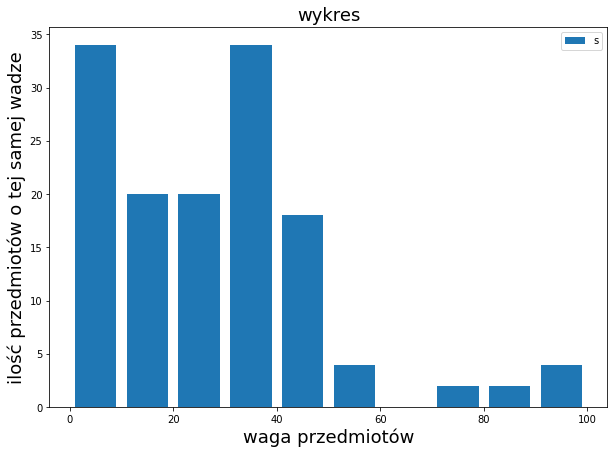

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))

populacja=[48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30,48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30,48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30,2,3,3,3,1,55,99,89,12,6,10,11,23,33,56,78,90,10,8,7,7,7,6,6,13,17,22,32,24,25,5,7,8,9,1,10,48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30,48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30,48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30,2,3,3,3,1,55,99,89,12,6,10,11,23,33,56,78,90,10,8,7,7,7,6,6,13,17,22,32,24,25,5,7,8,9,1,10]   
bins=[0,10,20,30,40,50,60,70,80,90,100]

plt.hist(populacja,bins,histtype='bar', rwidth=0.8)


plt.ylabel('ilość przedmiotów o tej samej wadze',fontsize='18')
plt.xlabel('waga przedmiotów',fontsize='18')
plt.title('wykres',fontsize='18')
plt.legend('s')
plt.show()

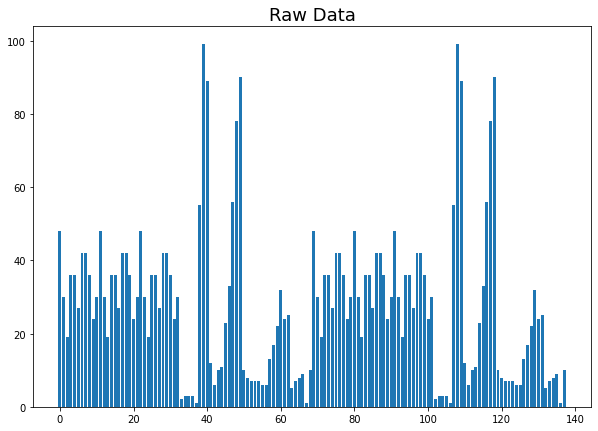

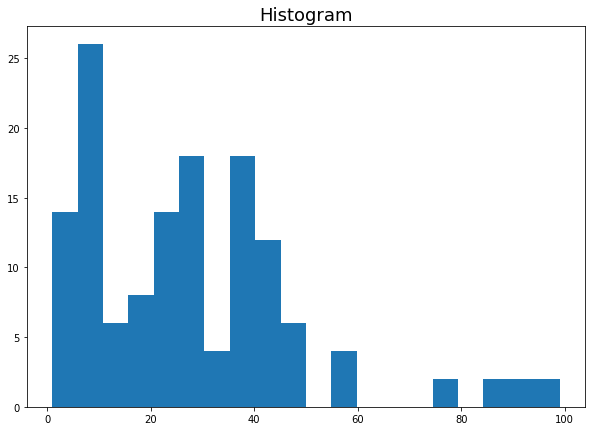

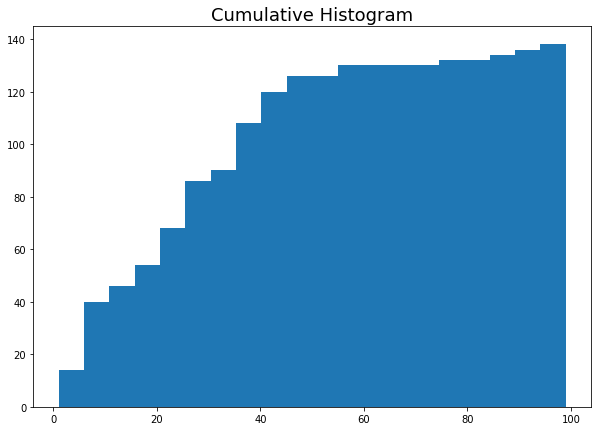

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(10,7))


n = [48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30,48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30,48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30,2,3,3,3,1,55,99,89,12,6,10,11,23,33,56,78,90,10,8,7,7,7,6,6,13,17,22,32,24,25,5,7,8,9,1,10,48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30,48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30,48, 30, 19, 36, 36, 27, 42, 42, 36, 24, 30,2,3,3,3,1,55,99,89,12,6,10,11,23,33,56,78,90,10,8,7,7,7,6,6,13,17,22,32,24,25,5,7,8,9,1,10] 

m = [m for m in range(len(n))]
plt.bar(m, n)
plt.title("Raw Data",fontsize='18')
plt.show()

plt.figure(figsize=(10,7))
plt.hist(n, bins=20)
plt.title("Histogram",fontsize='18')
plt.show()

plt.figure(figsize=(10,7))
plt.hist(n, cumulative=True, bins=20)
plt.title("Cumulative Histogram",fontsize='18')
plt.show()

In [ ]:
#wspomagałem się https://developers.google.com/optimization/bin/bin_packing